# Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

Import libraries and Load the Data file into Python DataFrame and view top 10 rows

In [2]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

# Load and review data

In [7]:
pData = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")  
pData.shape

(180, 7)

In [8]:
pData.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the focus is on the PCA technique, we will drop the non-numerica variables. Remember 'name' is categorical

In [10]:
#dropping/ignoring car_name  and origin
pData = pData.drop(['Name'], axis=1)
pData.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN
1,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN


# Dealing with Missing Values

In [11]:
pData.isna().sum()

Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [12]:
df1 = pData.dropna()
print(df1)

      Runs    Ave      SR  Fours  Sixes   HF
1    733.0  61.08  160.74   46.0   59.0  9.0
3    590.0  36.87  143.55   64.0   17.0  6.0
5    495.0  33.00  161.23   57.0   19.0  5.0
7    479.0  43.54  149.68   41.0   20.0  5.0
9    569.0  40.64  129.61   58.0   18.0  5.0
..     ...    ...     ...    ...    ...  ...
171   12.0   6.00   70.58    1.0    0.0  0.0
173   19.0   4.75   70.37    2.0    0.0  0.0
175   30.0   5.00   58.82    4.0    0.0  0.0
177    6.0   3.00   50.00    0.0    0.0  0.0
179    2.0   0.50   18.18    0.0    0.0  0.0

[90 rows x 6 columns]


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Runs    90 non-null     float64
 1   Ave     90 non-null     float64
 2   SR      90 non-null     float64
 3   Fours   90 non-null     float64
 4   Sixes   90 non-null     float64
 5   HF      90 non-null     float64
dtypes: float64(6)
memory usage: 4.9 KB


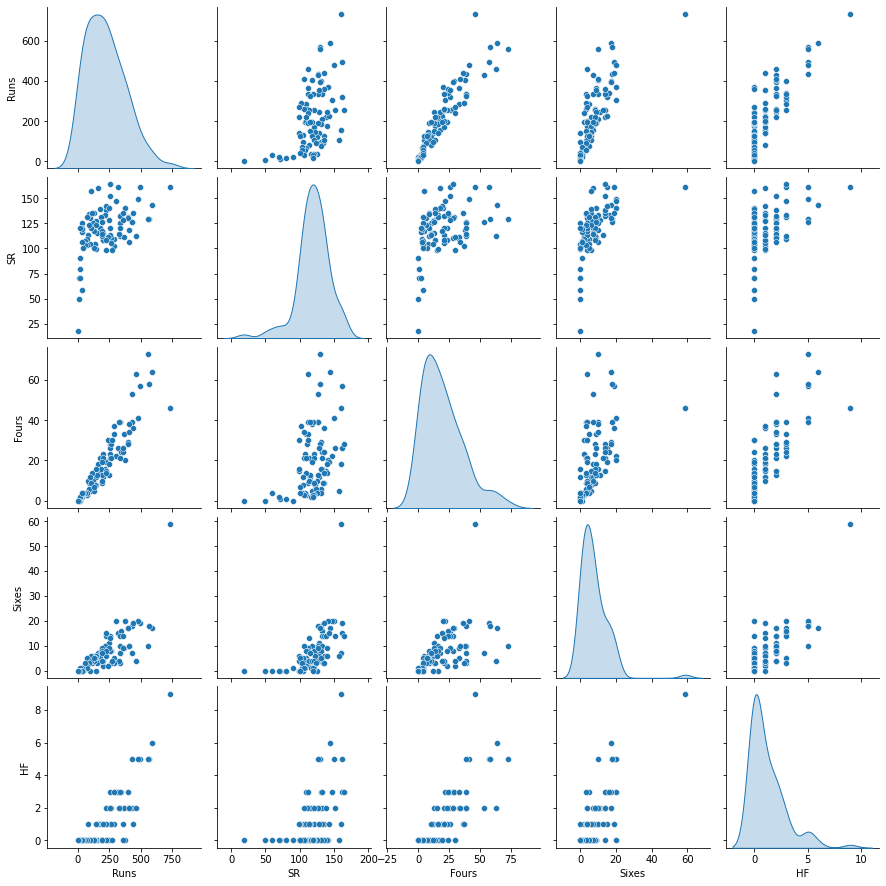

In [15]:
# independant variables
X = df1.drop(['Ave'], axis=1)
# the dependent variable
y = df1[['Ave']]

sns.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [16]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,Runs,SR,Fours,Sixes,HF
1,3.301945,1.767325,1.607207,6.462679,4.651551
3,2.381639,1.036605,2.710928,1.184173,2.865038
5,1.770248,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.297182,1.300618,1.561209,2.269533
9,2.246490,0.444038,2.343021,1.309851,2.269533


In [17]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[1.01123596 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.49903347 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.43238784 0.79249429 0.77632221 1.01123596]]


In [19]:
pca = PCA(n_components=4)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# The eigen Values

In [20]:
print(pca.explained_variance_)

[3.68478222 0.76834943 0.4166537  0.16789085]


# The eigen Vectors

In [21]:
print(pca.components_)

[[ 0.50187534  0.33604567  0.45359181  0.44869171  0.47762398]
 [ 0.20984172 -0.81284324  0.423568   -0.27196631  0.20463821]
 [-0.10965304 -0.44684702 -0.50827022  0.67127805  0.28169331]
 [ 0.45896789 -0.15903601  0.08281919  0.36357126 -0.7905776 ]]


And the percentage of variation explained by each eigen Vector

In [22]:
print(pca.explained_variance_ratio_)

[0.72876804 0.15196244 0.08240484 0.03320508]


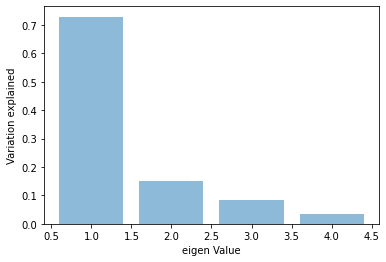

In [24]:
plt.bar(list(range(1,5)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

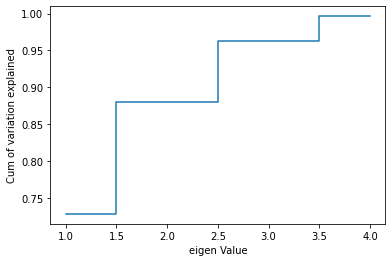

In [25]:
plt.step(list(range(1,5)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction
Now 2 dimensions seems very reasonable. With 2 variables we can explain over 95% of the variation in the original data!

In [34]:
pca3 = PCA(n_components=2)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.50187534  0.33604567  0.45359181  0.44869171  0.47762398]
 [ 0.20984172 -0.81284324  0.423568   -0.27196631  0.20463821]]
[0.72876804 0.15196244]


In [35]:
Xpca3

array([[ 8.10152541, -0.86865666],
       [ 4.67302663,  1.06967285],
       [ 4.25240095, -0.04154348],
       [ 3.64711217, -0.11380416],
       [ 4.01115296,  1.21110026],
       [ 3.94415467,  1.87164752],
       [ 1.95437354, -1.00513298],
       [ 3.00043486,  0.63796584],
       [ 2.0255917 , -1.18722575],
       [ 0.44481517, -0.48176541],
       [ 1.86405364, -1.28949355],
       [ 1.34478171, -1.0389625 ],
       [ 2.04572002, -0.02783656],
       [ 1.68992559, -0.2671498 ],
       [ 1.16136104, -1.09823098],
       [ 1.71144937, -0.1407103 ],
       [ 1.99136536, -0.2648631 ],
       [ 1.17709644, -0.38487182],
       [ 1.90886535,  1.02064248],
       [ 1.91216444,  1.91337748],
       [ 0.24685709, -1.55262135],
       [ 1.37186663,  0.44108356],
       [ 0.83448916, -0.63037827],
       [ 0.80489196,  1.0844425 ],
       [ 1.45592527,  0.77676867],
       [ 1.11927059,  0.74541232],
       [ 0.73408716, -0.90822714],
       [ 1.06648245,  1.26490111],
       [ 1.03633306,

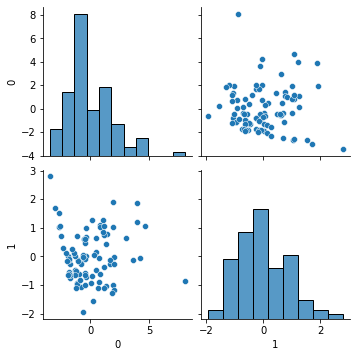

In [36]:
sns.pairplot(pd.DataFrame(Xpca3))

# Fit Linear Model
Lets construct two linear models. The first with all the 6 independent variables and the second with only the 3 new variables constructed using PCA.

In [37]:
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.6235574493253455

In [38]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.5907515131357903

# **k-means Clustering**
identify based on avg as well as strike Rate


Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.



Text(0.5, 1.0, 'Selecting k with the Elbow Method')

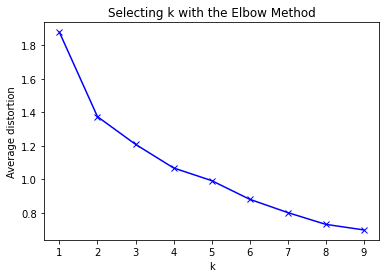

In [43]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(XScaled)
    prediction=model.predict(XScaled)
    meanDistortions.append(sum(np.min(cdist(XScaled, model.cluster_centers_, 'euclidean'), axis=1)) / XScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [47]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(XScaled)
prediction=final_model.predict(XScaled)

#Append the prediction 
df1["GROUP"] = prediction
XScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df1.head()

Groups Assigned : 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Runs,Ave,SR,Fours,Sixes,HF,avg,GROUP
1,733.0,61.08,160.74,46.0,59.0,9.0,2,2
3,590.0,36.87,143.55,64.0,17.0,6.0,2,2
5,495.0,33.00,161.23,57.0,19.0,5.0,2,2
7,479.0,43.54,149.68,41.0,20.0,5.0,2,2
9,569.0,40.64,129.61,58.0,18.0,5.0,2,2


Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.

In [48]:
pSuppClust = df1.groupby(['GROUP'])
pSuppClust.mean()

,Runs,Ave,SR,Fours,Sixes,HF,avg
GROUP,,,,,,,
0,112.725490,16.837451,109.557059,9.313725,3.235294,0.176471,0
1,318.312500,33.779062,129.269375,29.000000,11.125000,1.812500,1
2,551.285714,40.864286,142.962857,54.000000,23.000000,5.714286,2


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb4d1516d0>,
      dtype=object)

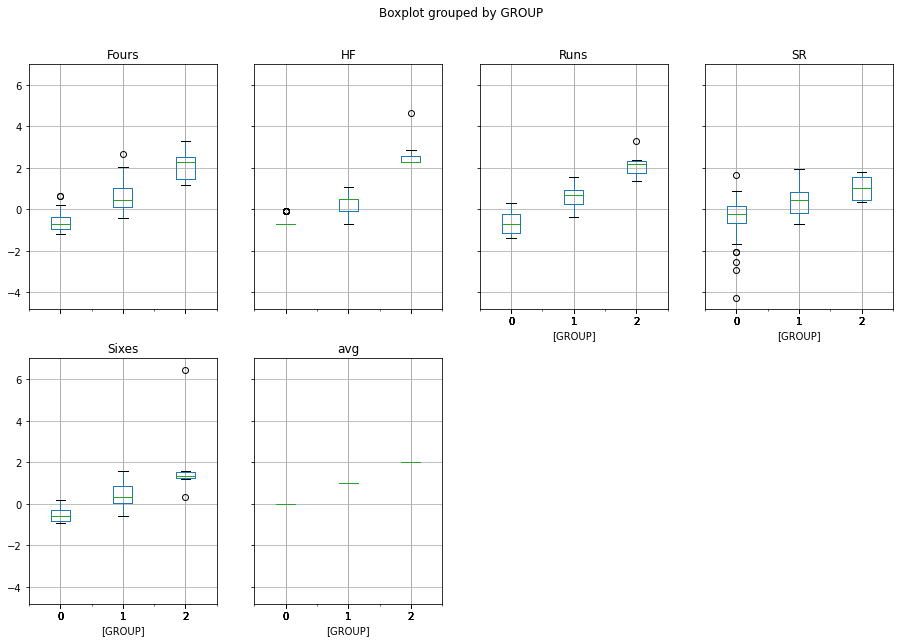

In [49]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#  Let us next try with K = 5, the next elbow point

In [50]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(XScaled)
prediction=final_model.predict(XScaled)

#Append the prediction 
df1["GROUP"] = prediction
XScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df1.head()

Groups Assigned : 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Runs,Ave,SR,Fours,Sixes,HF,avg,GROUP
1,733.0,61.08,160.74,46.0,59.0,9.0,2,4
3,590.0,36.87,143.55,64.0,17.0,6.0,2,1
5,495.0,33.00,161.23,57.0,19.0,5.0,2,1
7,479.0,43.54,149.68,41.0,20.0,5.0,2,1
9,569.0,40.64,129.61,58.0,18.0,5.0,2,1


In [51]:
pSuppClust = df1.groupby(['GROUP'])
pSuppClust.mean()

,Runs,Ave,SR,Fours,Sixes,HF,avg
GROUP,,,,,,,
0,128.295455,18.871136,117.022500,10.613636,3.727273,0.204545,0
1,521.000000,37.495000,140.000000,55.333333,17.000000,5.166667,2
2,318.312500,33.779062,129.269375,29.000000,11.125000,1.812500,1
3,14.857143,4.054286,62.631429,1.142857,0.142857,0.000000,0
4,733.000000,61.080000,160.740000,46.000000,59.000000,9.000000,2


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb4fd5a490>,
      dtype=object)

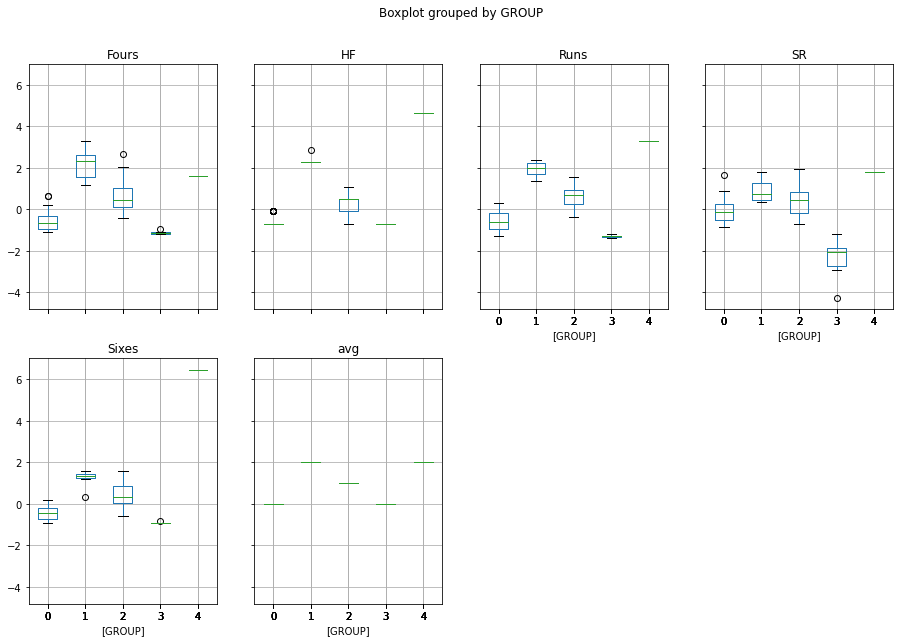

In [52]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

Conclusion: 
W e have used 2 different methods in above notebook
1. PCA for finding the players ranking and this model with liner fit method using avg column gave 0.62 result and it looks like it's drop from 0.62 to 0.59 result which is not a big difference.

2. we used k-means clustering method: in this method we obsereved that we can choose based on which ever atrribute like avg,strike rate is more important for their better results in business.